Considere o problema de valor de contorno

$$
\begin{cases}
v'' + 2xv' − x^2v = x^2 \\
v'(0) + v(0) = 1 \\
v'(1) + \frac{1}{2} v(1) = 0
\end{cases}
$$

# Questão 1

Escreva explicitamente o sistema de equações lineares que deve ser resolvido para obter uma aproximação
numérica da solução do problema de valor de contorno acima usando o método de diferenças finitas com
$h = \frac{1}{4}$.

## Introdução

Reorganizando o sistema, obtive:

$$
\begin{cases}
v'' = - 2xv' + x^2v + x^2 \\
v'(0) + v(0) = 1 \\
v'(1) + \frac{1}{2} v(1) = 0
\end{cases}
$$

tal que $A(x) = -2 x$, $B(x) = x^2$ e $C(x) = x^2$.

Vimos que o Método das Diferenças Finitas aplica a fórmula

$
r_k v_{k-1} + p_k v_k + q_k v_{k+1} = - h^2 C_k \; (1)
$.

Aplicarei $(1)$ para $k= 0, \ldots, n+1$.

Para os limites $k=0$ e $k=n+1$, há um problema pela indefinição dos valores $v_{-1}$ e $v_{n+2}$.



## $k=0$

Em particular, quando $k=0$, $(1)$ vale:

$
r_0 v_{-1} + p_0 v_0 + q_0 v_1 = - h^2 C_0 \; (2)
$.

Podemos definir o valor hipotético $v_{-1}$ a partir da condição de contorno:

$v'(x_0) + v(x_0) = \gamma_a \iff \frac{v_1 - v_{-1}}{2h} + v_0 = \gamma_a \iff v_1 - v_{-1} + 2 h v_0 = 2h \gamma_a \iff v_{-1} = v_1 + 2 h v_0 - 2h \gamma_a$.

Substituindo $v_{-1}$ em $(2)$, obtive:

$r_0 \times \left(  v_1 + 2 h v_0 - 2h \gamma_a  \right) + p_0 v_0 + q_0 v_1 = - h^2 C_0$, que equivale a 

$(2 h r_0 + p_0) v_0 + (r_0 + q_0) v_1 = - h^2 C_0 + 2h  r_0\gamma_a$

Especificamente, $\gamma_a = 1$, então segue

$(2 h r_0 + p_0) v_0 + (r_0 + q_0) v_1 = - h^2 C_0 + 2h  r_0$.



## $k=n+1$

Em particular, quando $k=n+1$, $(1)$ vale:

$
r_{n+1} v_{n} + p_{n+1} v_{n+1} + q_{n+1} v_{n+2} = - h^2 C_{n+1} \; (3)
$.

Podemos definir o valor hipotético $v_{n+2}$ a partir da condição de contorno:

$v'(x_{n+1}) + \frac{1}{2} v(x_{n+1}) = \gamma_b \iff \frac{v_{n+2} - v_{n}}{2h} + \frac{1}{2} v_{n+1} = \gamma_b \iff v_{n+2} - v_{n} + h v_{n+1} = 2h \gamma_b \iff v_{n+2} = v_n - h v_{n+1} + 2h \gamma_b$.

Substituindo $v_{n+2}$ em $(3)$, obtive:

$r_{n+1} v_{n} + p_{n+1} v_{n+1} + q_{n+1} \times \left(  v_n - h v_{n+1} + 2h \gamma_b  \right) = - h^2 C_{n+1}$, que equivale a 

$(r_{n+1} + q_{n+1}) v_n + (p_{n+1} - h q_{n+1}) v_{n+1} = - h^2 C_{n+1} - 2h  q_{n+1} \gamma_b$

Especificamente, $\gamma_b = 0$, então segue

$(r_{n+1} + q_{n+1}) v_n + (p_{n+1} - h q_{n+1}) v_{n+1} = - h^2 C_{n+1}$.

## Sistema a ser Resolvido

Logo, o sistema a ser resolvido segue do caso geral $(1)$ e de suas instâncias para $k=0$ e $k=n+1$.

$$
\begin{bmatrix}
(2 h r_0 + p_0) & (r_0 + q_0) & & & & \\
r_1 & p_1 & q_1 & & & \\
 & \ddots & \ddots & \ddots &  &  \\
 & & r_n & p_n & q_n &  \\
 &  & & & (r_{n+1} + q_{n+1}) & (p_{n+1} - h q_{n+1}) \\
\end{bmatrix}
\begin{bmatrix}
v_0 \\
v_1 \\
\vdots \\
v_n \\
v_{n+1}
\end{bmatrix}
=
\begin{bmatrix}
- h^2 C_0 + 2 h r_0 \\
- h^2 C_1 \\
\vdots \\
-h^2 C_n \\
-h^2 C_{n+1}
\end{bmatrix}
$$

em que 

$$
\begin{cases}
A(x) = A_x = -2 x \\
B(x) = B_x = x^2 \\
C(x) = C_x = x^2 \\
p_x = 2 + B_x h^2 \\
q_x = -1 + \frac{A_x h}{2} \\
r_x = -1 - \frac{A_x h}{2}
\end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = lambda x: - 2 * x
B = lambda x: np.square(x)
C = lambda x: np.square(x)

p = lambda x,h: 2 + B(x) * np.square(h)
q = lambda x,h: -1 + A(x) * h / 2
r = lambda x,h: -1 - A(x) * h / 2

In [3]:
a = 0
b = 1
gamma_a = 1
gamma_b = 0

In [4]:
def resolverSistema(h):
    n = int((b - a)/h  -  1)
    x = np.linspace(a, b, n+2)

    mA = np.zeros((n+2,n+2))
    vb = np.zeros((n+2,))

    # Primeira linha da matriz e do vetor do lado direito:
    mA[0,0] = 2 * h * r(x[0],h) + p(x[0],h)
    mA[0,1] = r(x[0],h) + q(x[0],h)
    vb[0] = 2*h*gamma_a*r(x[0],h) - np.square(h) * C(x[0])

    # Equações para os pontos no interior da malha:
    for k in range(1,n+1):
        mA[k,k-1] = r(x[k],h)
        mA[k,k] = p(x[k],h)
        mA[k,k+1] = q(x[k],h)
        vb[k] = - np.square(h) * C(x[k])

    # Última linha da matriz e do vetor do lado direito:
    mA[n+1,n] = r(x[n+1],h) + q(x[n+1],h)
    mA[n+1,n+1] = p(x[n+1],h) - h * q(x[n+1],h)
    vb[n+1] = - np.square(h) * C(x[n+1]) - 2 * h * q(x[n+1],h) * gamma_b

    print(mA,vb)

    v = np.linalg.solve(mA,vb)
    return n, x, v

In [15]:
def validarSistema(v, h, n):

    dv = np.array([(v[i] - v[i-2])/(2*h) for i in range(2,n+2)])
    dv = np.append(np.array((v[1] - v[0])/h), dv)
    dv = np.append(dv, np.array((v[-1] - v[-2])/h))

    plt.plot(x,v, color="blue",label="$v$")
    plt.plot(x,dv,color="green",label="$v'$")
    plt.plot(x,v+dv,color="orange",label="$v' + v$")
    plt.plot(x,0.5*v+dv,color="red",label="$v' + 0.5 v$")
    plt.scatter([0,1],[1,0],label="Contorno",zorder=10)
    plt.ylim((-9,13))

    plt.legend()
    plt.show()

    return dv

In [16]:
h = 2**-2
n,x,v = resolverSistema(h)
n, x, v

[[ 1.5        -2.          0.          0.          0.        ]
 [-0.9375      2.00390625 -1.0625      0.          0.        ]
 [ 0.         -0.875       2.015625   -1.125       0.        ]
 [ 0.          0.         -0.8125      2.03515625 -1.1875    ]
 [ 0.          0.          0.         -2.          2.375     ]] [-0.5        -0.00390625 -0.015625   -0.03515625 -0.0625    ]


(3,
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([7.61027375, 5.95770531, 4.52513649, 3.4876543 , 2.91065625]))

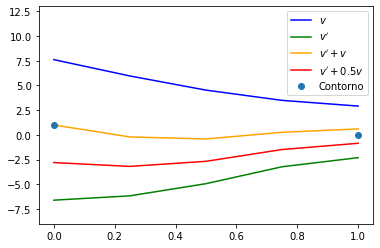

In [17]:
dv = validarSistema(v,h,n)

Explicitamente, o sistema de equações lineares resolvido é:

$$
\begin{bmatrix}
1.5     &   -2.         & 0.      &    0.     &     0.        \\
-0.9375  &    2.00390625 & -1.0625 &     0.    &      0.        \\
0.        & -0.875 &      2.015625  & -1.125    &   0.        \\
0.         & 0.     &   -0.8125    &  2.03515625 & -1.1875    \\
0.          & 0.     &     0.       &  -2.      &    2.375
\end{bmatrix}
\begin{bmatrix}
v_0 \\
v_1 \\
v_2 \\
v_3 \\
v_4
\end{bmatrix}
\begin{bmatrix}
-0.5      \\
-0.00390625 \\
-0.015625   \\
-0.03515625 \\
-0.0625   
\end{bmatrix}
$$

A solução obtida satisfez a condição inicial de $v'(0)+v(0) = 1$, mas não satisfez a outra. Isso ocorreu pelo baixo número de pontos considerados.

# Questão 2

Encontre uma aproximação numérica do problema de valor de contorno acima usando o método de diferenças finitas com $h = \frac{1}{64}$.

In [18]:
h=2**-6
n, x, v = resolverSistema(h)
n,x,v

[[ 1.96875    -2.          0.         ...  0.          0.
   0.        ]
 [-0.99975586  2.00000006 -1.00024414 ...  0.          0.
   0.        ]
 [ 0.         -0.99951172  2.00000024 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.00022912 -1.01513672
   0.        ]
 [ 0.          0.          0.         ... -0.98461914  2.00023657
  -1.01538086]
 [ 0.          0.          0.         ...  0.         -2.
   2.01611328]] [-3.12500000e-02 -5.96046448e-08 -2.38418579e-07 -5.36441803e-07
 -9.53674316e-07 -1.49011612e-06 -2.14576721e-06 -2.92062759e-06
 -3.81469727e-06 -4.82797623e-06 -5.96046448e-06 -7.21216202e-06
 -8.58306885e-06 -1.00731850e-05 -1.16825104e-05 -1.34110451e-05
 -1.52587891e-05 -1.72257423e-05 -1.93119049e-05 -2.15172768e-05
 -2.38418579e-05 -2.62856483e-05 -2.88486481e-05 -3.15308571e-05
 -3.43322754e-05 -3.72529030e-05 -4.02927399e-05 -4.34517860e-05
 -4.67300415e-05 -5.01275063e-05 -5.36441803e-05 -5.72800636e-05
 -6.10351562e-05 -6.

(63, array([0.      , 0.015625, 0.03125 , 0.046875, 0.0625  , 0.078125,
        0.09375 , 0.109375, 0.125   , 0.140625, 0.15625 , 0.171875,
        0.1875  , 0.203125, 0.21875 , 0.234375, 0.25    , 0.265625,
        0.28125 , 0.296875, 0.3125  , 0.328125, 0.34375 , 0.359375,
        0.375   , 0.390625, 0.40625 , 0.421875, 0.4375  , 0.453125,
        0.46875 , 0.484375, 0.5     , 0.515625, 0.53125 , 0.546875,
        0.5625  , 0.578125, 0.59375 , 0.609375, 0.625   , 0.640625,
        0.65625 , 0.671875, 0.6875  , 0.703125, 0.71875 , 0.734375,
        0.75    , 0.765625, 0.78125 , 0.796875, 0.8125  , 0.828125,
        0.84375 , 0.859375, 0.875   , 0.890625, 0.90625 , 0.921875,
        0.9375  , 0.953125, 0.96875 , 0.984375, 1.      ]), array([8.50474393, 8.38748231, 8.27027848, 8.15319127, 8.03628036,
        7.91960617, 7.80322976, 7.68721266, 7.57161675, 7.45650414,
        7.34193703, 7.22797757, 7.11468774, 7.00212922, 6.89036328,
        6.77945062, 6.6694513 , 6.56042457, 6.4524288

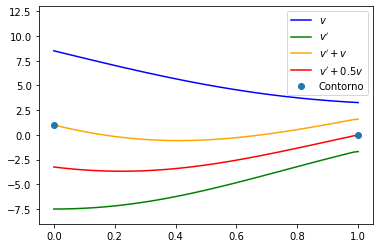

In [19]:
dv = validarSistema(v,h,n)

Reutilizando o código para $h = \frac{1}{64}$, pude encontrar a nova aproximação numérica.

A resolução do sistema com maior precisão $\left(h = \frac{1}{64}\right)$ revelou que os valores de contorno são satisfeitos pelo método.